In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fierro_ipynb.mplstyle')

\pagebreak

# Introduction
A Jupyter Notebook is an open-source web application that allows you to create and share documents containing live code, equations, visualizations, and narrative text. The tool supports over 40 programming languages, including Python and C++. Jupyter Notebooks are ideal for data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. Its interactive environment enables users to iterate on code snippets, analyze data on the fly, and document their process, which is invaluable for collaborative and reproducible scientific research, as well as educational purposes. The ability to combine code execution with rich-text elements makes Jupyter Notebooks a versatile tool for comprehensive computational narratives.

# Sympy
SymPy is a robust Computer Algebra System (CAS) that excels at solving mathematical problems symbolically. As a viable alternative to platforms like Mathematica, SymPy is particularly effective in environments such as Jupyter Notebook, where it can visually demonstrate mathematical procedures. Despite its strengths, SymPy can be slow in some applications, making it less suitable for automation tasks. For behind-the-scenes mathematical computations, it is often more efficient to use numerical methods provided by libraries like NumPy and SciPy.

## Sympy Examples
### Defining Symbols and Functions

In [2]:
# Defining symbols
# Use sp.Symbol() to define a symbol one at a time
# Use sp.symbols() define multiple symbols at one time
x, y = sp.symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [3]:
# You can leverage the full power of latex to render any kind of symbol
x_dot, x_a = sp.symbols(r'\dot{x} x_a')
display(x_dot, x_a)

\dot{x}

x_a

In [4]:
# Defining functions
t, s = sp.symbols('t s')
x_t, x_ts, X = sp.Function('x')(t), sp.Function('x')(t, s), sp.Function('X')(s)
display(x_t, x_ts, X)

x(t)

x(t, s)

X(s)

### Solving Equations

In [5]:
# Symbolically solving equations
eq = sp.Eq(expr, 1)
eq

Eq(x + 2*y, 1)

In [6]:
sol = sp.solve(eq, x)[0]
sol

1 - 2*y

In [7]:
# Sometimes a dictionary output is more preferable
sol_dict = sp.solve(eq, x, dict=True)[0]
for key, value in sol_dict.items():
    display(sp.Eq(key, value))

Eq(x, 1 - 2*y)

In [8]:
# Solving a system of equations
a = sp.Symbol('a')
eq1 = sp.Eq(x*y + 3*y + a, 7)
eq2 = sp.Eq(y + 5*x, 2)
display(eq1, eq2)  # show equations first

Eq(a + x*y + 3*y, 7)

Eq(5*x + y, 2)

In [9]:
sols = sp.solve((eq1, eq2), (x, y), dict=True)
sols

[{x: -sqrt(20*a + 149)/10 - 13/10, y: sqrt(20*a + 149)/2 + 17/2},
 {x: sqrt(20*a + 149)/10 - 13/10, y: 17/2 - sqrt(20*a + 149)/2}]

In [10]:
for sol in sols:
    for key, value in sol.items():
        display(sp.Eq(key, value))

Eq(x, -sqrt(20*a + 149)/10 - 13/10)

Eq(y, sqrt(20*a + 149)/2 + 17/2)

Eq(x, sqrt(20*a + 149)/10 - 13/10)

Eq(y, 17/2 - sqrt(20*a + 149)/2)

# Matplotlib
Matplotlib is a widely-used Python library for creating static, interactive, and animated visualizations. It provides a vast array of functions to plot various types of graphs, such as line charts, scatter plots, bar graphs, and more, with fine-grained control over visual styles and layout. This flexibility makes Matplotlib an essential tool for data visualization in scientific computing, and its integration with Jupyter notebooks offers an intuitive workflow for exploratory data analysis.

## Matplotlib Examples

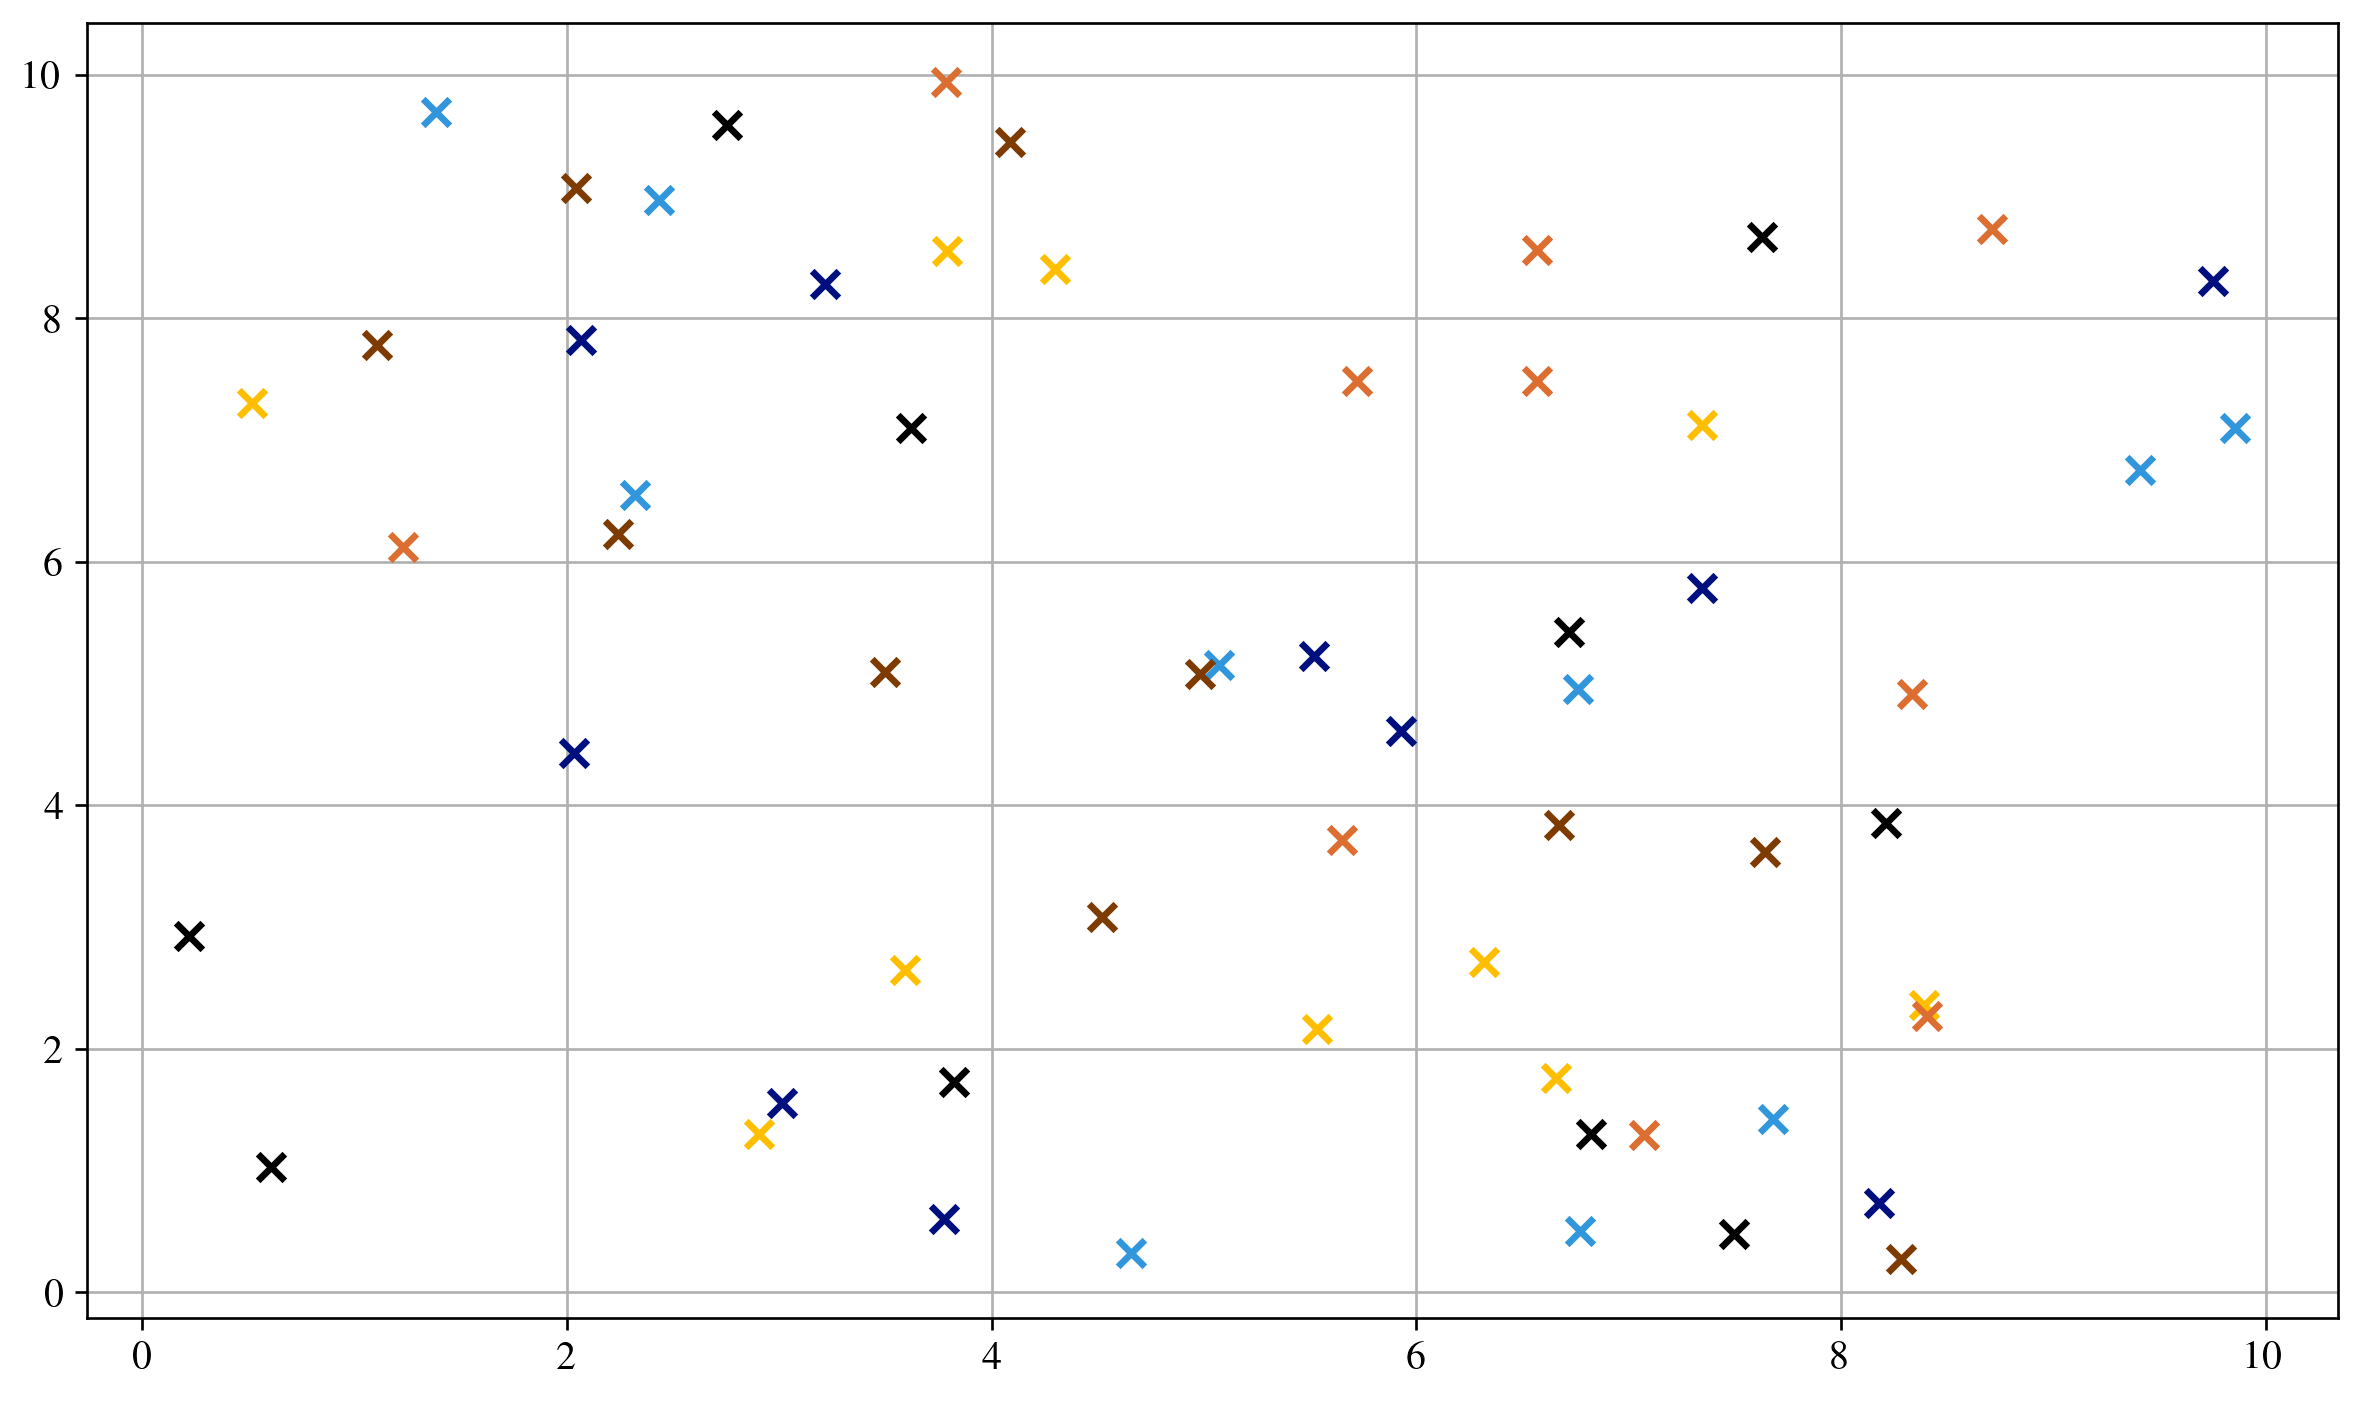

In [11]:
# Random scatter plot
# be sure to show scratch.py
array_size = 10

fig, ax = plt.subplots()
for _ in range(6):
    x = np.random.uniform(0, 10, array_size)
    y = np.random.uniform(0, 10, array_size)
    ax.scatter(x, y, marker='x', zorder=2)
plt.show()

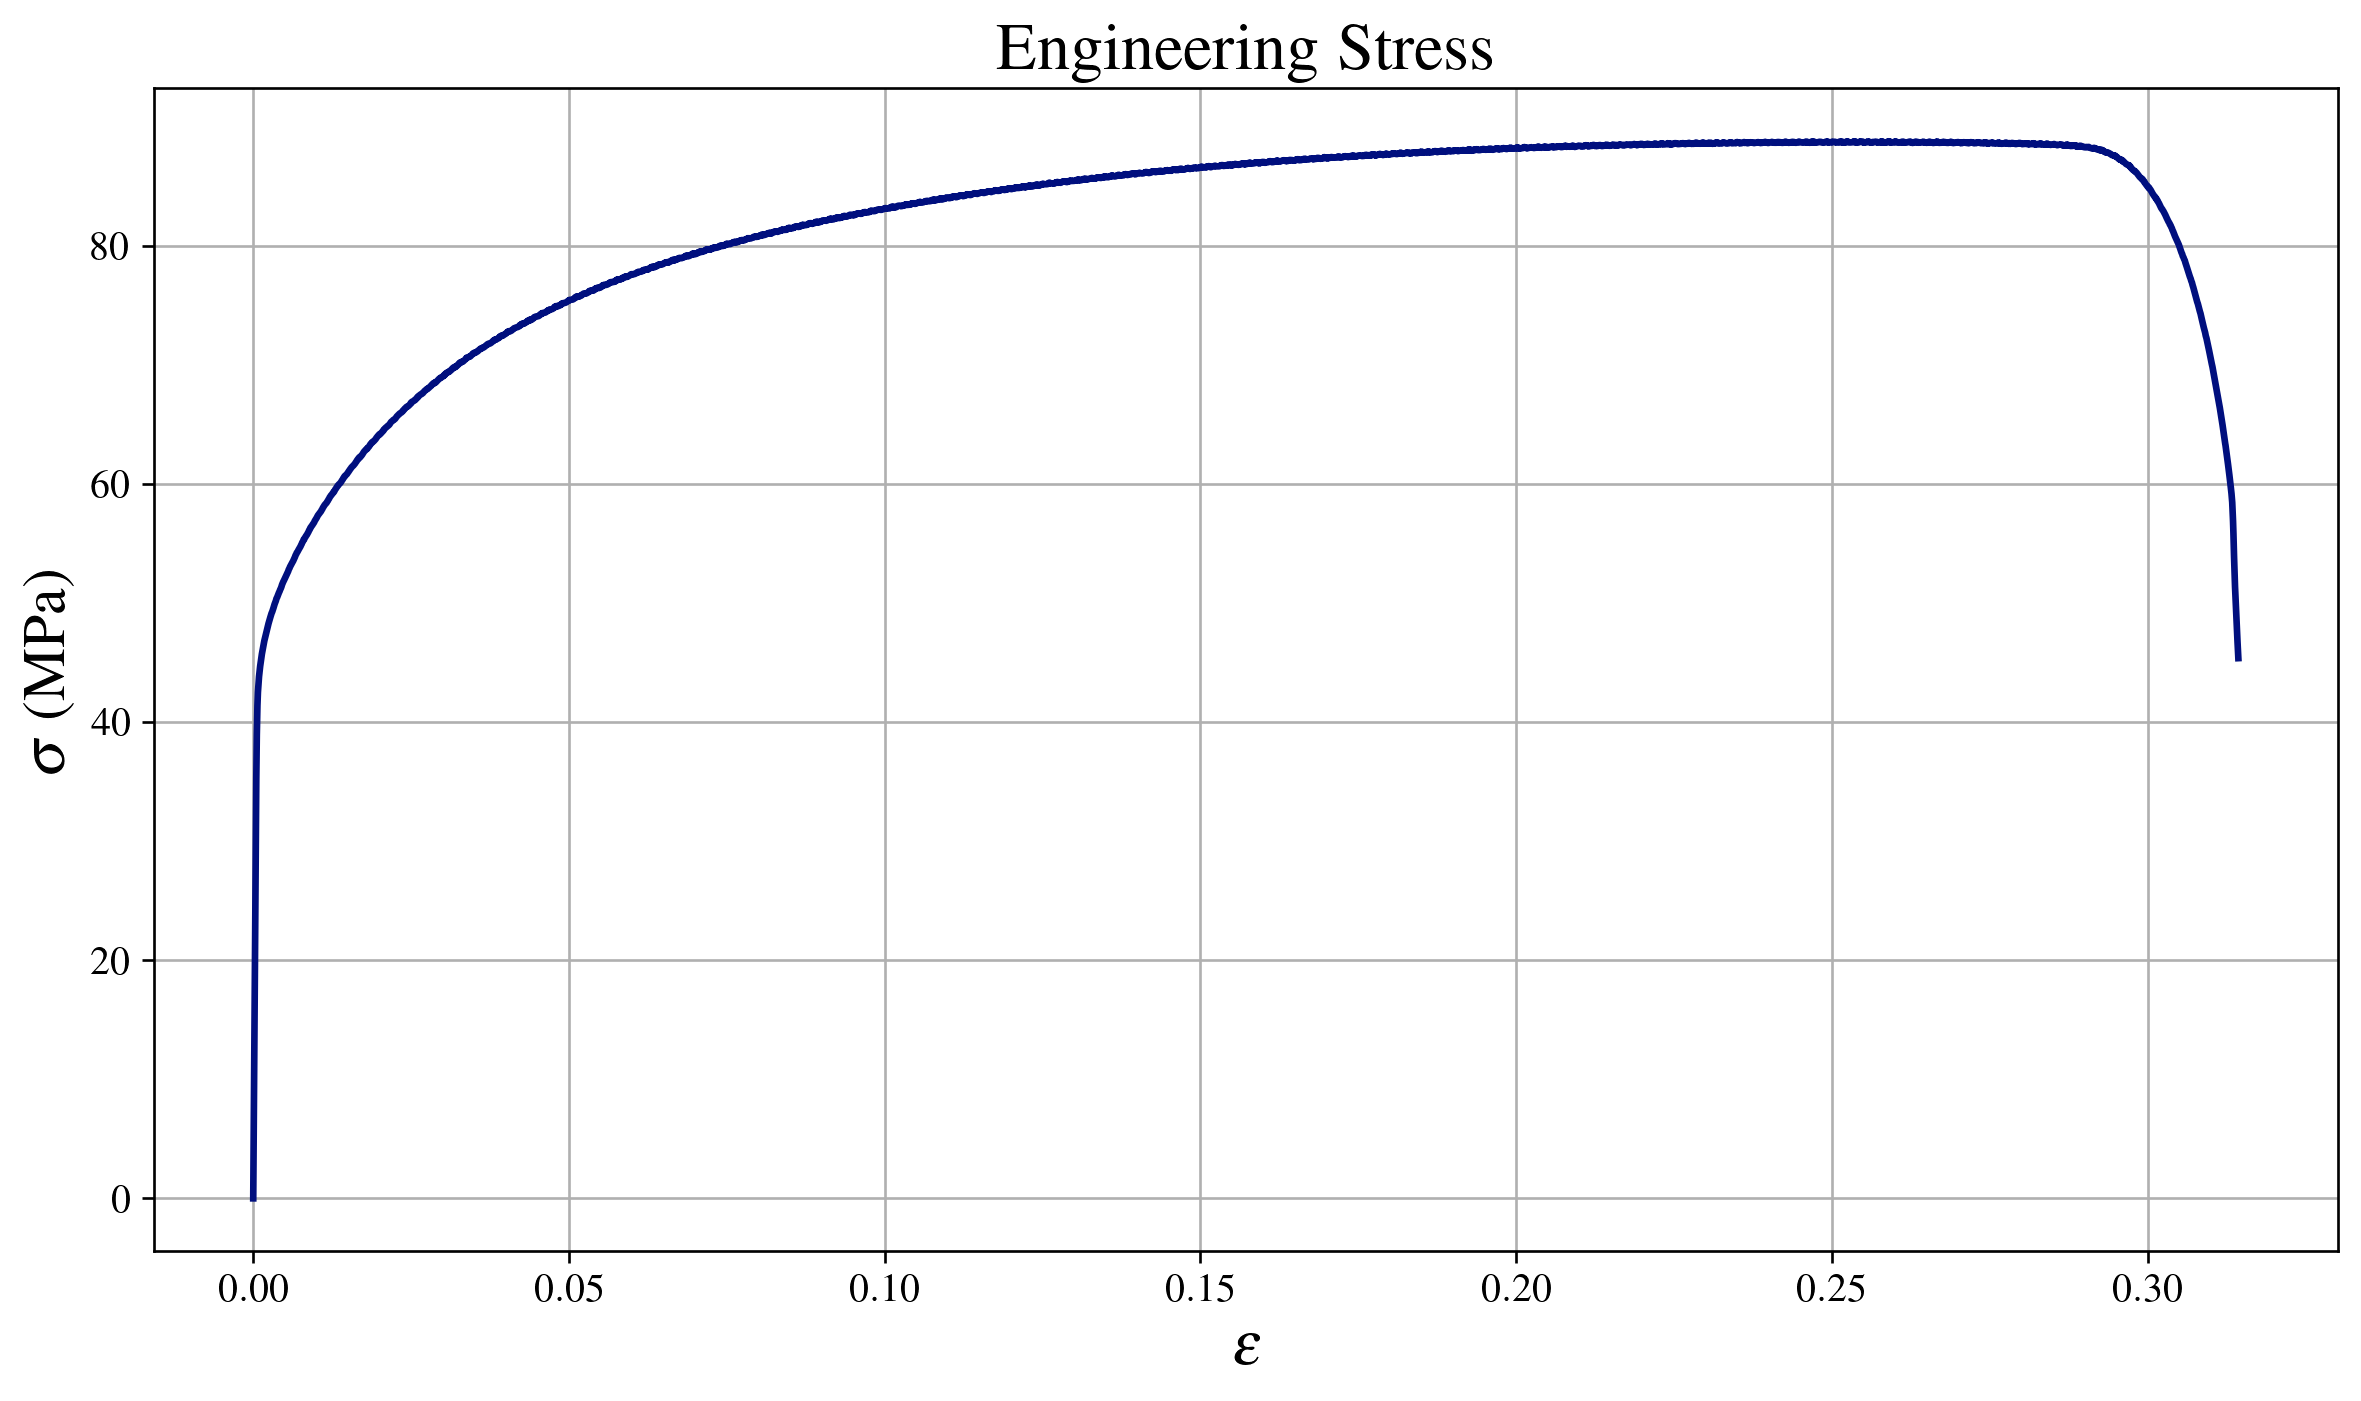

In [12]:
# Practical example of generating stress-strain curve
data = pd.read_excel('tensile_test.xlsx', sheet_name='Specimen 1')  # might need to pip install openpyxl

L = 65  # mm
w, t = 6.92, 2.27  # mm

strain = data['Displacement']/L
stress = data['Load']/(w*t)  # MPa

fig, ax = plt.subplots()
ax.plot(strain, stress)
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\sigma$ (MPa)')
ax.set_title('Engineering Stress')
# fig.savefig('Specimen 1 Stress.png')
plt.show()